# Exercise Set 9

Due: **9:30 13 June 2022**

Discussion: **13:00 17 June 2022**

**Online submission** at via [ILIAS](https://www.ilias.uni-koeln.de/ilias/goto_uk_exc_4593683.html) in the directory Exercises / Übungen -> Submission of Exercises / Rückgabe des Übungsblätter

Data analysis and code development is typically done in larger collaborations. The most common way to do this is with a cloud service suce as [GitHub](https://www.github.com). `git` is a common method used for version control. You can find a descriptions of the various capabilities for example at [Atlassian](https://www.atlassian.com/git/tutorials/setting-up-a-repository).

It is recommended that you register on GitHub to get used to it. For the remainder of the course, you may keep your solutions on GitHub and simply send a link to the necessary folder as the ILIAS submission (for example in an ascii file). If you choose to do so, the requirements for a submission remain the same (submit a self-contained pdf) and additional requirements that your repository is called `DataAnalysis` and the exercise solutions are placed in directories `exercise_x/` (so for exercise 9 it would be `exercise_9/`).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sb
from sklearn import linear_model
from scipy.optimize import curve_fit
from matplotlib import collections as matcoll
import scipy.stats as st

# 1. Regression - Fitting a line [data exercise] **[50 Points]**

In this problem we will fit a linear function $f(x) = y_0 + \beta_0 x$ to the data from datafile: `line_data.dat`.

**a)** Perform the linear regression to fit a linear function $f(x) = y_0 + \beta_0 x$ and plot $f(x)$ together with the data points. **25 Points**

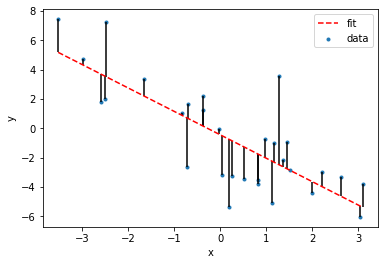

In [2]:
# load the data
df = pd.read_csv("line_data.dat", sep="\s+", names=["x", "y"])
# as arrays
x, y = df["x"].to_numpy(), df["y"].to_numpy()
# Function for fitting
def lin_func(x, y0, beta):
    f = y0 + beta * x
    return f


# linear fit
popt, pcov = curve_fit(lin_func, x, y)
x2 = np.linspace(np.min(x), np.max(x), 1000)
# difference between data and the fit
y_predicted = lin_func(x, popt[0], popt[1])
diff = y - y_predicted

# lines between prediction and data
lines = []
for i in range(len(x)):
    pair = [(x[i], y[i]), (x[i], y_predicted[i])]
    lines.append(pair)
# print(lines)
linecoll = matcoll.LineCollection(lines, colors="k")
# plot the data
fig, ax = plt.subplots()
ax.scatter(x, y, label="data", s=9)
# ax.scatter(x,lin_func(x,popt[0],popt[1]),s=10,c='green',marker='o',label='predicted')
ax.plot(x2, lin_func(x2, popt[0], popt[1]), ls="--", c="red", label="fit")
ax.add_collection(linecoll)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.savefig("plots/linreg.png", dpi=400, bbox_inches="tight")

**b)** Compute the residuals and plot them. What is $R^2$? **25 Points**

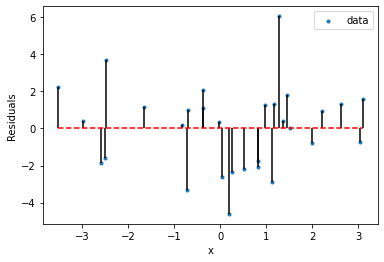

In [3]:
# Compute the residuals and plot them
# lines between prediction and data
lines = []
for i in range(len(x)):
    pair = [(x[i], 0), (x[i], y[i] - y_predicted[i])]
    lines.append(pair)

linecoll = matcoll.LineCollection(lines, colors="k")

fig, ax = plt.subplots()
ax.scatter(x, diff, label="data", s=9)
ax.plot(x2, np.zeros_like(x2), "--", c="r")
ax.add_collection(linecoll)
ax.set_ylabel("Residuals")
ax.set_xlabel("x")
ax.legend()
plt.savefig("plots/residuals.png", dpi=400, bbox_inches="tight")

In [4]:
# R^2
# In the case of only one dependent variable, R^2 is the square of the pearson corr coeff
R2 = (st.pearsonr(x, y)[0]) ** 2
print("R2 = ", R2)

R2 =  0.6124158502151285


# 2. Model fit quality assessment **[50 Points]**

In this problem you will assess the quality of a fit by inspecting the residuals of the fit. For each of the
following plots state whether the residuals indicate a reasonable model fit and briefly explain your
conclusion and if applicable how possibly to improve the fit. **50 Points**

![test](residuals.jpg)

# Plot a)
The residuals indicate a good model fit because the residuals are centred around y=0.

# Plot b)
randomly distributed about y=0. Indicates a good model.

# Plot c)
Trend in the residuals, model is not a good fit

# Plot d)

# Plot e)
Trend in the residuals, the model is not suitable for the data.